In [1]:
from diffusers import DiffusionPipeline
import torch

# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 30
high_noise_frac = 0.8

prompt = "A majestic lion jumping from a big stone at night"

# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]


/home/KDT-admin/miniconda3/envs/bonghoon/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
2024-02-19 12:51:50.763123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/KDT-admin/miniconda3/envs/bonghoon/lib/python3.8/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

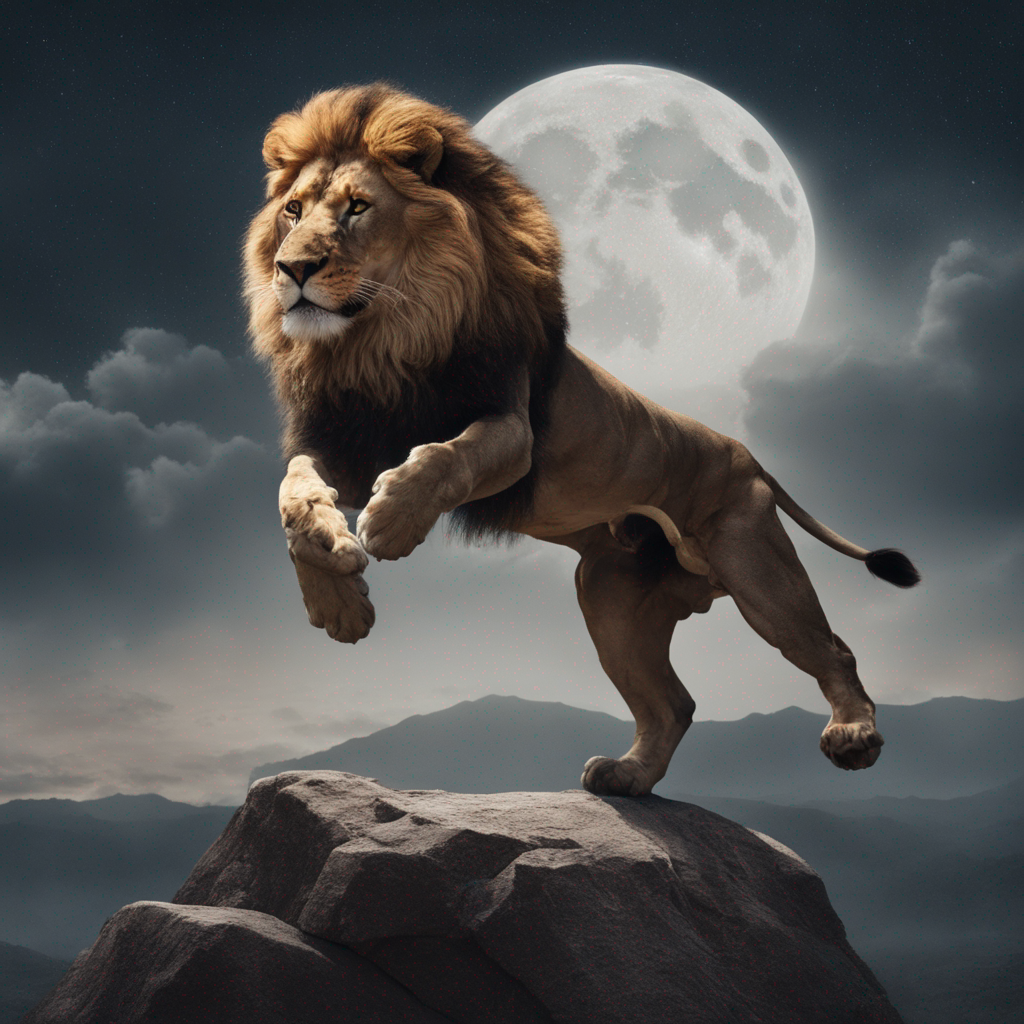

In [3]:
image

In [6]:
from translate import Translator

translator = Translator(from_lang="ko", to_lang='en')
translation = translator.translate("시계 토끼")
translation

'Watch rabbit'

In [7]:
def generate_image(text):
    print(f'ko : {text}')
    translation = translator.translate(text)
    print(f'en : {translation}')

    image = base(
        prompt=translation,
        num_inference_steps=n_steps,
        denoising_end=high_noise_frac,
        output_type="latent",
    ).images

    image = refiner(
        prompt=translation,
        num_inference_steps=n_steps,
        denoising_start=high_noise_frac,
        image=image,
    ).images[0]

    return image

In [10]:
def generate_image(text):
    print(f'ko : {text}')
    translation = translator.translate(text)
    print(f'en : {translation}')

    image = base(
        prompt=translation,
    ).images[0]

    return image

In [11]:
img = generate_image("사과 든 노인")

ko : 사과 든 노인
en : Old man with an apple


  0%|          | 0/50 [00:00<?, ?it/s]

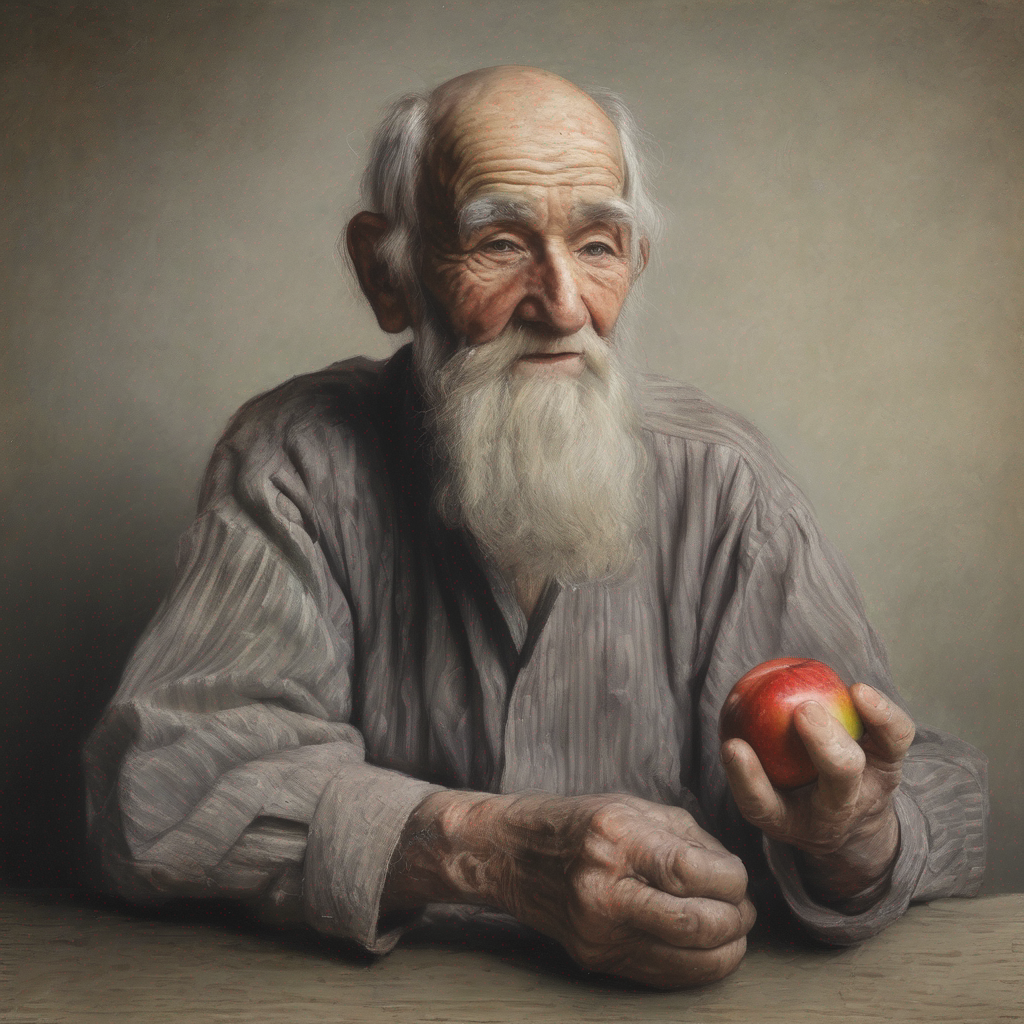

In [12]:
img

In [13]:
import gradio as gr

def inference(text):
    return generate_image(text)

demo = gr.Interface(fn=inference, inputs="text", outputs="image")
demo.launch(debug=True, share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://d452c50bc77407ee32.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


ko : 물마시고 있는 사람
en : Person drinking water


  0%|          | 0/50 [00:00<?, ?it/s]

ko : 길가다가 넘어졌는데 알고보니 껌이였다
en : I fell on the road and it turned out to be chewing gum


  0%|          | 0/50 [00:00<?, ?it/s]

ko : 길가다가 껌을 밟아서 넘어졌는데 아팠다.
en : I fell down on the road by stepping on the chewing gum, but it hurt.


  0%|          | 0/50 [00:00<?, ?it/s]

ko : 정면을 바라보고있는 30살 여자
en : 30 year old woman looking forward


  0%|          | 0/50 [00:00<?, ?it/s]

ko : 정면을 바라보고있는 30살 여자, photorealistic, 4k, no 4 legs
en : 30 year old woman looking forward, photorealistic, 4k, no 4 legs


  0%|          | 0/50 [00:00<?, ?it/s]

ko : 여름날의 바닷가
en : Summer Seaside


  0%|          | 0/50 [00:00<?, ?it/s]

ko : shore in summer
en : shore in summer


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d452c50bc77407ee32.gradio.live
